In [1]:
dat = readRDS('generate_qtl_3_annotate_1.rds')

In [8]:
data = dat$data_p
data_ann = dat$data_ann_p
source('Wavelet_Multivariate_Susie.R')

In [9]:
library(mmbr)
# source("Wavelet_Multivariate_Susie.R")
## get the prior
X = t(data$geno)
L <- 1
# test_num <- 1:100 # is there any need to set the test/train since we are detecting association
# heter_mask = apply(data$geno, MARGIN = 1, FUN = function(x) length(unique(x))>1)

m_list = list()
for(i in unique(data_ann$seg_ID)){
  mask_seg = row.names(data$methy) %in% data_ann[data_ann$seg_ID == i,]$ID
  y = t(data$methy[mask_seg, ])
  m_list[[i]] = Wave_MSusie(Y = y, G = X, plot_out = F)
}

fit_res = m_list

In [9]:
# blk contingency
pos_blk = unique(data_ann$seg_ID[data_ann$meQTL!=0])
neg_blk = unique(data_ann$seg_ID[data_ann$meQTL ==0])[-1] # -1 is to remove the 160 methyl cite which is not influenced
sig_blk = unique(data_ann$seg_ID)[unlist(lapply(fit_res, FUN = function(x) {!is.null(x$m_susie$sets$cs)}))]
nsig_blk = unique(data_ann$seg_ID)[unlist(lapply(fit_res, FUN = function(x) {is.null(x$m_susie$sets$cs)}))]
blk_conting = list(pos_blk = pos_blk, neg_blk = neg_blk, sig_blk = sig_blk, nsig_blk = nsig_blk)

# pair contingency
lfsr_mat = lapply(1:length(fit_res), function(x) {
  mat = fit_res[[x]]$m_susie$lfsr
  rownames(mat) = colnames(X)
  colnames(mat) = rownames(data$methy)[seq(16*(x-1)+1, 16*(x-1)+ncol(mat))]
  mat})
all_pair = paste(rep(rownames(data$geno), each = nrow(data$methy)), rownames(data$methy), sep = "-")

pos_pair = data_ann %>% filter(meQTL!=0) %>% mutate(pos_ind = paste(meQTL, ID, sep = "-")) %>% pull(pos_ind)
neg_pair = setdiff(all_pair,pos_pair)
sig_pair = unlist(lapply(lfsr_mat, function(x) {
  sig_ind = which(x <=lfsr_threshold, arr.ind = T)
  apply(sig_ind,1,function(y) paste(rownames(x)[y[1]],colnames(x)[y[2]],sep = "-"))
}))
nsig_pair = unlist(lapply(lfsr_mat, function(x) {
  nsig_ind = which(x > lfsr_threshold, arr.ind = T)
  apply(nsig_ind,1,function(y) paste(rownames(x)[y[1]],colnames(x)[y[2]],sep = "-"))
}))
pair_conting = list(pos_pair = pos_pair, neg_pair = neg_pair, sig_pair = sig_pair, nsig_pair = nsig_pair)

Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is not a multiple of shorter object length”
Warning message in methods::is(data) == c("numeric", "vector"):
“longer object length is n

ERROR: Error in data_ann %>% filter(meQTL != 0) %>% mutate(pos_ind = paste(meQTL, : could not find function "%>%"


In [17]:
length(m_list)

[1] 45

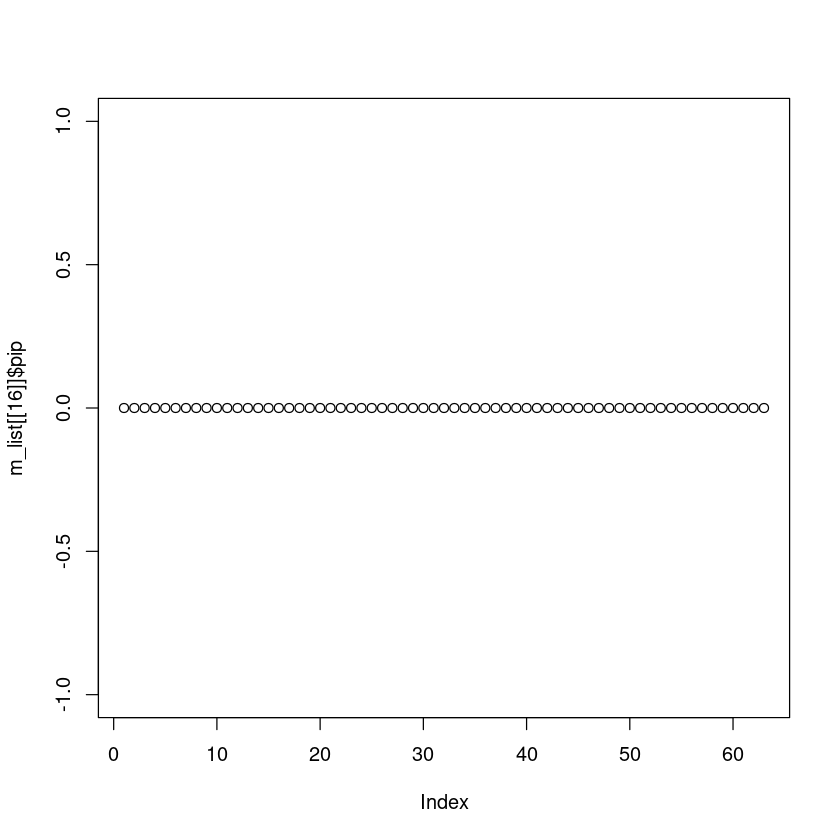

In [28]:
plot(m_list[[16]]$pip)